In [2]:
#Code to merge two csv files

import os
import glob
import pandas as pd
path = r"C:\Users\pr14p\Desktop\Final\All 50-50"

file_list = glob.glob(path + "/*.csv")
print('File names:', file_list)

pd.concat(map(pd.read_csv, file_list), 
          ignore_index=True).to_csv(r'C:\Users\pr14p\Desktop\Final\all_data_with_inique_value.csv',index=False)


File names: ['C:\\Users\\pr14p\\Desktop\\Final\\All 50-50\\infected.csv', 'C:\\Users\\pr14p\\Desktop\\Final\\All 50-50\\uninfected.csv']


In [3]:
#Code for unique value for each cell
import os
import glob
import pandas as pd
ui_data = pd.read_csv(r'C:\Users\pr14p\Desktop\Final\all_data_with_inique_value.csv')
ui_data['Operation_id'] = ""
id_dict = {}
count = 2
row = 0

#for details
# Creating a Dictionary for unique values as key and a number as value
for cell in ui_data['Operation']:
    if id_dict.get(cell):
        pass
    else:
        id_dict[cell] = count 
        count = count + 1
# Assigning the values from Dictionary to New Column
for index, row in ui_data.iterrows():
    if row['Operation'] in id_dict:
        ui_data.loc[index, 'Operation_id'] = id_dict[row['Operation']]
#For operation
#views the head for Detail
ui_data['Operation'].head


# Creating a Dictionary for unique values as key and a number as value
#for path
for cell in ui_data['Path']:
    if id_dict.get(cell):
        pass
    else:
        id_dict[cell] = count 
        count = count + 1
# Assigning the values from Dictionary to New Column
for index, row in ui_data.iterrows():
    if row['Path'] in id_dict:
        ui_data.loc[index, 'Path_id'] = id_dict[row['Path']]

#views the head for Detail
ui_data['Path'].head

# Creating a Dictionary for unique values as key and a number as value
#for Detail
for cell in ui_data['Detail']:
    if id_dict.get(cell):
        pass
    else:
        id_dict[cell] = count 
        count = count + 1
# Assigning the values from Dictionary to New Column
for index, row in ui_data.iterrows():
    if row['Detail'] in id_dict:
        ui_data.loc[index, 'Detail_id'] = id_dict[row['Detail']]

#views the head for Detail
ui_data['Detail'].head
# specified name.
ui_data.to_csv(r'C:\Users\pr14p\Desktop\Final\All 50-50\Finalwithvalue.csv', index=False)

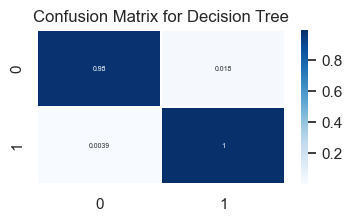

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    154451
           1       0.99      1.00      0.99    369837

    accuracy                           0.99    524288
   macro avg       0.99      0.99      0.99    524288
weighted avg       0.99      0.99      0.99    524288



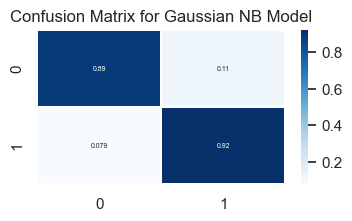

              precision    recall  f1-score   support

           0       0.82      0.89      0.85    154451
           1       0.95      0.92      0.94    369837

    accuracy                           0.91    524288
   macro avg       0.89      0.90      0.90    524288
weighted avg       0.91      0.91      0.91    524288



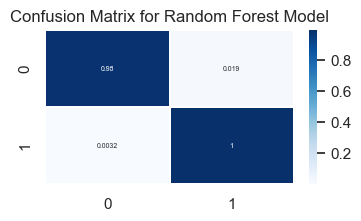

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    154451
           1       0.99      1.00      0.99    369837

    accuracy                           0.99    524288
   macro avg       0.99      0.99      0.99    524288
weighted avg       0.99      0.99      0.99    524288



C:\Users\pr14p\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


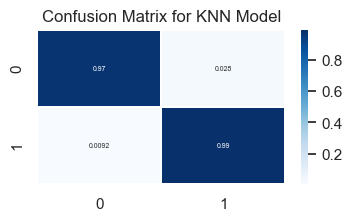

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    154451
           1       0.99      0.99      0.99    369837

    accuracy                           0.99    524288
   macro avg       0.98      0.98      0.98    524288
weighted avg       0.99      0.99      0.99    524288



'Decision Tree: 0.9919071197509766, Gaussian NB: 0.9110183715820312, Random Forest: 0.9922256469726562, KNN: 0.9853477478027344'

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = r'C:\Users\pr14p\Desktop\Final\All 50-50\all_data_with_inique_value.csv'
# read them in


df = pd.read_csv(path)

# turn them into dataframes


x = df.drop(['Process Name', 'Time of Day', 'Operation', 'Path', 'Detail', 'Class','Command Line','PID','Operation_id'], axis = 1)

y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.50)



# Decision Tree classification
modelDecision = DecisionTreeClassifier()
modelDecision.fit(X_train, y_train)
predictionsDecision = modelDecision.predict(X_test)
scoreDecision = accuracy_score(y_test,predictionsDecision)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictionsDecision)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(4,2))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':5},
            cmap=plt.cm.Blues, linewidths=0.2)
plt.title('Confusion Matrix for Decision Tree')
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, predictionsDecision))

# Gaussian NB Classification
modelGaussian = GaussianNB()
modelGaussian.fit(X_train, y_train)
predictionsGaussian = modelGaussian.predict(X_test)
scoreGaussian = accuracy_score(y_test,predictionsGaussian)

# View confusion matrix for test data and predictions
confusion_matrix(y_test, predictionsGaussian)

# Get and reshape confusion matrix data for Gaussian
matrix = confusion_matrix(y_test, predictionsGaussian)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(4,2))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':5},
            cmap=plt.cm.Blues, linewidths=0.2)
plt.title('Confusion Matrix for Gaussian NB Model')
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, predictionsGaussian))

# Random Forest Classifier
modelRF=RandomForestClassifier(n_estimators=100, random_state = 9)
modelRF.fit(X_train, y_train)
predictionsRF = modelRF.predict(X_test)
scoreRF = accuracy_score(y_test,predictionsRF)

# View confusion matrix for test data and predictions
confusion_matrix(y_test, predictionsRF)

# Get and reshape confusion matrix data for Random Forest Model
matrix = confusion_matrix(y_test, predictionsRF)
matrix = matrix.astype('int') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(4,2))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':5},
            cmap=plt.cm.Blues, linewidths=0.2)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
# View the classification report for test data and predictions
print(classification_report(y_test, predictionsRF))
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
scoreKNN = accuracy_score(y_test,prediction)


# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, prediction)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(4,2))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':5},
            cmap=plt.cm.Blues, linewidths=0.2)
plt.title('Confusion Matrix for KNN Model')
plt.show()

# View the classification report for test data and predictions
print(classification_report(y_test, prediction))

"Decision Tree: " + str(scoreDecision) +", Gaussian NB: "+ str(scoreGaussian) + ", Random Forest: " + str(scoreRF)+ ", KNN: " + str(scoreKNN)